### Agenda 
- Working with data using python libraries.
- Data Visualization
- Exploratory Data Analysis and Data Preprocessing

### Dataset Description:
The data contains details for over 18,000 players playing in various football
clubs in Europe. It contains information on age, skill rating, wages and player
value, etc. The files provided are as follows:

## ● Load and explore data 

### 1. Import the required libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

### Read data set

In [17]:
## Load teh datasets
fifa = pd.read_csv('fifa.csv')
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [18]:
fifaVar=pd.read_csv('fifa_ variable_information.csv')
fifaVar.head()

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag


### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [19]:
fifa.sample(6)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
15108,244921,Sergio Moreno,19,https://cdn.sofifa.org/players/4/19/244921.png,Spain,https://cdn.sofifa.org/flags/45.png,60,73,Rayo Vallecano,https://cdn.sofifa.org/teams/2/light/480.png,...,42.0,11.0,14.0,19.0,14.0,13.0,8.0,9.0,13.0,€1.1M
5863,240193,E. Rexhbeçaj,20,https://cdn.sofifa.org/players/4/19/240193.png,Kosovo,https://cdn.sofifa.org/flags/219.png,69,80,VfL Wolfsburg,https://cdn.sofifa.org/teams/2/light/175.png,...,60.0,64.0,63.0,59.0,14.0,11.0,6.0,8.0,14.0,€3.4M
12521,242551,I. Smith,20,https://cdn.sofifa.org/players/4/19/242551.png,Costa Rica,https://cdn.sofifa.org/flags/72.png,63,77,IFK Norrköping,https://cdn.sofifa.org/teams/2/light/702.png,...,48.0,57.0,64.0,60.0,10.0,5.0,13.0,11.0,13.0,€1.4M
9344,228225,W. Harding,21,https://cdn.sofifa.org/players/4/19/228225.png,England,https://cdn.sofifa.org/flags/14.png,66,75,Birmingham City,https://cdn.sofifa.org/teams/2/light/88.png,...,55.0,60.0,65.0,61.0,12.0,13.0,11.0,15.0,10.0,€1.8M
9035,209210,A. Grant,24,https://cdn.sofifa.org/players/4/19/209210.png,Australia,https://cdn.sofifa.org/flags/195.png,66,70,Perth Glory,https://cdn.sofifa.org/teams/2/light/111399.png,...,63.0,62.0,70.0,69.0,14.0,9.0,11.0,8.0,8.0,€928K
9097,227145,C. Carrillo,25,https://cdn.sofifa.org/players/4/19/227145.png,Colombia,https://cdn.sofifa.org/flags/56.png,66,70,Millonarios FC,https://cdn.sofifa.org/teams/2/light/101105.png,...,60.0,65.0,67.0,60.0,14.0,11.0,11.0,10.0,12.0,€1M


In [20]:
fifaVar.sample(6)

,ID,unique id for every player
53,GKDiving,rating on scale of 100
25,Finishing,rating on scale of 100
48,Penalties,rating on scale of 100
22,Height,height of the player
5,Overall,overall rating
33,BallControl,rating on scale of 100


In [21]:
## Lets check the shape
fifa.shape

(18207, 60)

In [22]:
## Lets check the shape
fifaVar.shape

(59, 2)

In [23]:
## Lets check basic information of the data
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [24]:
fifaVar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          59 non-null     object
 1   unique id for every player  59 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB


In [25]:
fifa.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,18207.0,214298.338606,29965.244204,16.0,200315.5,221759.0,236529.5,246620.0
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Jersey Number,18147.0,19.546096,15.947765,1.0,8.0,17.0,26.0,99.0
Crossing,18159.0,49.734181,18.364524,5.0,38.0,54.0,64.0,93.0
Finishing,18159.0,45.550911,19.525820,2.0,30.0,49.0,62.0,95.0


In [26]:
fifaVar.describe()

,ID,unique id for every player
count,59,59
unique,59,25
top,Name,rating on scale of 100
freq,1,33


### 3. Drop the columns which you think redundant for the analysis

In [27]:
## drop the redundant categorical features first
fifa.drop(['Photo','Flag','Club Logo','Loaned From'],axis=1,inplace=True)

In [15]:
fifa.head(2)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


## ● Data Cleaning and Preprocessing 

### 4. Convert the columns "Value", "Wage", "Release Clause" to float datatype after getting rid of currency symbol and suffix. 

In [28]:
## Checking the value data
fifa['Value'].unique()

array(['€110.5M', '€77M', '€118.5M', '€72M', '€102M', '€93M', '€67M',
       '€80M', '€51M', '€68M', '€76.5M', '€44M', '€60M', '€63M', '€89M',
       '€83.5M', '€78M', '€58M', '€53.5M', '€51.5M', '€38M', '€64.5M',
       '€27M', '€81M', '€69.5M', '€59.5M', '€62M', '€73.5M', '€59M',
       '€46M', '€43M', '€36M', '€57M', '€24M', '€30M', '€4M', '€64M',
       '€30.5M', '€62.5M', '€52M', '€45M', '€34M', '€46.5M', '€61M',
       '€41.5M', '€44.5M', '€56.5M', '€53M', '€50M', '€55M', '€36.5M',
       '€45.5M', '€43.5M', '€35M', '€39M', '€18M', '€21.5M', '€50.5M',
       '€54M', '€40.5M', '€37.5M', '€28.5M', '€37M', '€32M', '€26M',
       '€33M', '€38.5M', '€35.5M', '€9M', '€15.5M', '€22M', '€14M',
       '€42.5M', '€31.5M', '€42M', '€25M', '€29.5M', '€31M', '€24.5M',
       '€27.5M', '€29M', '€16.5M', '€23M', '€19M', '€4.2M', '€40M',
       '€41M', '€28M', '€22.5M', '€34.5M', '€32.5M', '€20M', '€26.5M',
       '€25.5M', '€21M', '€13M', '€17.5M', '€11.5M', '€8M', '€6M',
       '€19.5M', '€6.5

In [29]:
## let us replace '€' as '' in the column value
fifa['Value'] = fifa['Value'].str.replace('€','')

In [30]:
## let us convert "K" and "M" for thousand and million value
fifa['Value'] = (fifa['Value'].replace(r'[KM]+$', '', regex=True).astype(float) * 
             fifa['Value'].str.extract(r'[\d\.]+([KM]+)', expand=False)
                       .fillna(1)
                       .replace(['K','M'],[10**3,10**6]).astype(float))
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [31]:
fifa['Wage'].unique()

array(['€565K', '€405K', '€290K', '€260K', '€355K', '€340K', '€420K',
       '€455K', '€380K', '€94K', '€205K', '€125K', '€285K', '€225K',
       '€145K', '€240K', '€315K', '€200K', '€130K', '€300K', '€215K',
       '€100K', '€255K', '€165K', '€265K', '€160K', '€150K', '€245K',
       '€110K', '€77K', '€115K', '€210K', '€195K', '€230K', '€250K',
       '€135K', '€155K', '€180K', '€175K', '€190K', '€185K', '€21K',
       '€82K', '€73K', '€92K', '€88K', '€96K', '€170K', '€66K', '€235K',
       '€28K', '€105K', '€38K', '€81K', '€57K', '€15K', '€63K', '€22K',
       '€84K', '€120K', '€90K', '€72K', '€93K', '€45K', '€74K', '€51K',
       '€42K', '€31K', '€75K', '€25K', '€140K', '€41K', '€78K', '€53K',
       '€95K', '€80K', '€43K', '€60K', '€85K', '€64K', '€67K', '€18K',
       '€70K', '€91K', '€20K', '€49K', '€87K', '€86K', '€26K', '€29K',
       '€55K', '€35K', '€33K', '€56K', '€30K', '€11K', '€59K', '€23K',
       '€46K', '€39K', '€32K', '€36K', '€98K', '€54K', '€68K', '€58K',
       '€2

In [32]:
## let us replace '€' as '' in the column value and convert "K" and "M" for thousand and million value
fifa['Wage'] = fifa['Wage'].str.replace('€','')
fifa['Wage'] = (fifa['Wage'].replace(r'[KM]+$', '', regex=True).astype(float) * 
             fifa['Wage'].str.extract(r'[\d\.]+([KM]+)', expand=False)
                       .fillna(1)
                       .replace(['K','M'],[10**3,10**6]).astype(float))
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [33]:
fifa['Release Clause'].unique()

array(['€226.5M', '€127.1M', '€228.1M', ..., '€74K', '€101K', '€147K'],
      dtype=object)

In [34]:
## let us replace '€' as '' in the column value and convert "K" and "M" for thousand and million value
fifa['Release Clause'] = fifa['Release Clause'].str.replace('€','')
fifa['Release Clause'] = (fifa['Release Clause'].replace(r'[KM]+$', '', regex=True).astype(float) * 
             fifa['Release Clause'].str.extract(r'[\d\.]+([KM]+)', expand=False)
                       .fillna(1)
                       .replace(['K','M'],[10**3,10**6]).astype(float))
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


### 5. Convert the column "Joined" into integer data type with keeping only the year.

In [35]:
 ## checking for the values in joined column
fifa['Joined'].unique()

array(['Jul 1, 2004', 'Jul 10, 2018', 'Aug 3, 2017', ..., 'May 22, 2017',
       'Nov 6, 2016', 'Nov 27, 2018'], dtype=object)

In [36]:
## convert the Joined column to datetime type and get the year 
fifa['Joined'] = pd.to_datetime(fifa['Joined'])
fifa['Joined'] = fifa['Joined'].dt.year
fifa['Joined'].unique()

array([2004., 2018., 2017., 2011., 2015., 2012., 2014., 2005., 2010.,
       2016., 2008., 2013.,   nan, 2007., 2009., 2002., 2003., 2006.,
       2001., 1991., 1998., 2000., 1999.])

In [37]:
## convert joined column to interger type
fifa['Joined'].fillna(1).astype(int)

0        2004
1        2018
2        2017
3        2011
4        2015
         ... 
18202    2017
18203    2018
18204    2017
18205    2018
18206    2018
Name: Joined, Length: 18207, dtype: int32

### 6. Convert the column "Contract Valid Until" to pandas datetime type.

In [38]:
fifa['Contract Valid Until'].unique()

array(['2021', '2022', '2020', '2023', '2019', '2024', 'Jun 30, 2019',
       '2025', '2026', 'Dec 31, 2018', '2018', nan, 'May 31, 2020',
       'Jun 30, 2020', 'May 31, 2019', 'Dec 31, 2019', 'Jan 1, 2019',
       'Jun 1, 2019', 'Jan 4, 2019', 'Jan 31, 2019', 'Jan 7, 2019',
       'Jan 2, 2019', 'Jan 6, 2019', 'Oct 14, 2019', 'Jan 3, 2019',
       'May 4, 2019', 'Jan 12, 2019', 'Jan 25, 2019', 'Jan 18, 2019',
       'Dec 1, 2019', 'Nov 30, 2018', 'Feb 27, 2020', 'Jan 5, 2019',
       'Jan 15, 2019', 'Jan 30, 2019', 'Jan 11, 2019', 'Jan 20, 2019'],
      dtype=object)

In [39]:
## convert the contract valid until to datetime type
fifa['Contract Valid Until']=pd.to_datetime(fifa['Contract Valid Until'])
fifa['Contract Valid Until'].unique()

array(['2021-01-01T00:00:00.000000000', '2022-01-01T00:00:00.000000000',
       '2020-01-01T00:00:00.000000000', '2023-01-01T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000', '2024-01-01T00:00:00.000000000',
       '2019-06-30T00:00:00.000000000', '2025-01-01T00:00:00.000000000',
       '2026-01-01T00:00:00.000000000', '2018-12-31T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000',                           'NaT',
       '2020-05-31T00:00:00.000000000', '2020-06-30T00:00:00.000000000',
       '2019-05-31T00:00:00.000000000', '2019-12-31T00:00:00.000000000',
       '2019-06-01T00:00:00.000000000', '2019-01-04T00:00:00.000000000',
       '2019-01-31T00:00:00.000000000', '2019-01-07T00:00:00.000000000',
       '2019-01-02T00:00:00.000000000', '2019-01-06T00:00:00.000000000',
       '2019-10-14T00:00:00.000000000', '2019-01-03T00:00:00.000000000',
       '2019-05-04T00:00:00.000000000', '2019-01-12T00:00:00.000000000',
       '2019-01-25T00:00:00.000000000', '2019-01-18

### 7. The column 'Height' is in inches with a quotation mark, Convert to float with decimal points.

In [40]:
fifa['Height'].unique()

array(["5'7", "6'2", "5'9", "6'4", "5'11", "5'8", "6'0", "5'6", "5'10",
       "6'6", "6'1", "5'4", "6'3", "5'5", "6'5", "6'7", "5'3", "5'2",
       "6'8", "5'1", "6'9", nan], dtype=object)

In [41]:
## replace the ' to . and convert the value to float type
fifa['Height']=fifa['Height'].str.replace("'",'.').astype(float)
fifa['Height'].unique()

array([5.7 , 6.2 , 5.9 , 6.4 , 5.11, 5.8 , 6.  , 5.6 , 5.1 , 6.6 , 6.1 ,
       5.4 , 6.3 , 5.5 , 6.5 , 6.7 , 5.3 , 5.2 , 6.8 , 6.9 ,  nan])

### 8. The column "Weight" has the suffix as lbs, remove the suffix and convert to float

In [42]:
## replace the lbs to ''  and convert the value to float type
fifa['Weight']=fifa['Weight'].str.replace('lbs','').astype(float)
fifa['Weight'].unique()

array([159., 183., 150., 168., 154., 163., 146., 190., 181., 192., 176.,
       172., 148., 165., 196., 161., 187., 212., 170., 203., 157., 185.,
       130., 174., 207., 134., 141., 152., 179., 132., 201., 198., 209.,
       214., 143., 205., 137., 194., 216., 139., 220., 126., 218., 123.,
       227., 128., 223., 225., 121., 115., 117., 236., 229., 243.,  nan,
       110., 119., 234.])

### 9. Check for the percentage of missing values and impute them with appropriate imputation techniques.

In [44]:
## computing the percentage of missing values
fifa.isnull().sum()*100/len(fifa)

ID                          0.000000
Name                        0.000000
Age                         0.000000
Nationality                 0.000000
Overall                     0.000000
Potential                   0.000000
Club                        1.323667
Value                       0.000000
Wage                        0.000000
Preferred Foot              0.263635
International Reputation    0.263635
Weak Foot                   0.263635
Skill Moves                 0.263635
Work Rate                   0.263635
Body Type                   0.263635
Position                    0.329544
Jersey Number               0.329544
Joined                      8.529686
Contract Valid Until        1.587302
Height                      0.263635
Weight                      0.263635
Crossing                    0.263635
Finishing                   0.263635
HeadingAccuracy             0.263635
ShortPassing                0.263635
Volleys                     0.263635
Dribbling                   0.263635
C

In [46]:
print(fifa.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=True))

None


# ● Exploratory Data Analysis

### 10. Plot the distribution of Overall rating for all the players and write your findings.

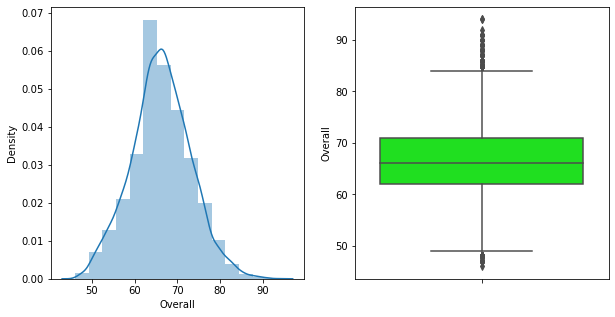

In [48]:
Fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(fifa['Overall'], bins=15, ax=ax[0])
sns.boxplot(y=fifa['Overall'], ax=ax[1], color='lime')
plt.show()

#### Box plot shows there are outliers 

### 11. Retrieve the names of top20 players based on the Overall rating.

In [49]:
df_overall_sort = fifa.copy()
df_overall_sort.sort_values(by='Overall', ascending=False)
print(df_overall_sort[['Name','Overall']].head(20))

                 Name  Overall
0            L. Messi       94
1   Cristiano Ronaldo       94
2           Neymar Jr       92
3              De Gea       91
4        K. De Bruyne       91
5           E. Hazard       91
6           L. Modrić       91
7           L. Suárez       91
8        Sergio Ramos       91
9            J. Oblak       90
10     R. Lewandowski       90
11           T. Kroos       90
12           D. Godín       90
13        David Silva       90
14           N. Kanté       89
15          P. Dybala       89
16            H. Kane       89
17       A. Griezmann       89
18      M. ter Stegen       89
19        T. Courtois       89


### 12. Generate a dataframe which should include all the information of the Top 20 players based on the Overall rating.

In [55]:
fifa_top20=df_overall_sort.head(20)
fifa_top20.shape

(20, 56)

In [56]:
fifa_top20

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000.0,Right,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
9,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68000000.0,94000.0,Right,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144500000.0


### 13. What is the average "Age" and "Wage" of these top 20 players?

In [57]:
avg_age = str(fifa_top20['Age'].mean())
avg_wage = str(fifa_top20['Wage'].mean())
print('Average Age : ' + avg_age + ' Yrs and Average Wage : €' + avg_wage)

Average Age : 28.3 Yrs and Average Wage : €289700.0


### 14. Among the top 20 players based on the Overall rating, which player has the highest wage? Display the name of the player with his wage.

In [58]:
fifa_top20.sort_values(by = ['Overall', 'Wage'], axis=0, ascending=[False, False], inplace=False, kind='quicksort', na_position='first', ignore_index=True, key=None)
print(fifa_top20[['Name', 'Wage']].head(1))

       Name      Wage
0  L. Messi  565000.0


### 15. Generate a dataframe which should include the "Player name", "Club Name", "Wage", and 'Overall rating'.

####  i) find the average Overall rating for each club.


In [61]:
fifa_selected_col=fifa[['Name','Club','Wage','Overall']]

In [62]:
fifa_selected_col.head()

,Name,Club,Wage,Overall
0,L. Messi,FC Barcelona,565000.0,94
1,Cristiano Ronaldo,Juventus,405000.0,94
2,Neymar Jr,Paris Saint-Germain,290000.0,92
3,De Gea,Manchester United,260000.0,91
4,K. De Bruyne,Manchester City,355000.0,91


####  ii) Display the average overall rating of Top10 Clubs using a plot


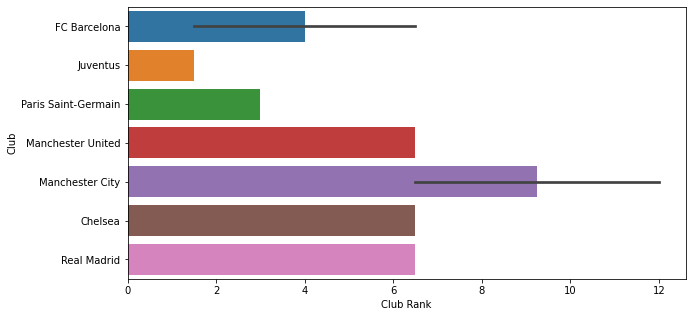

                 Name                 Club      Wage  Overall  Club Rank
0            L. Messi         FC Barcelona  565000.0       94        1.5
1   Cristiano Ronaldo             Juventus  405000.0       94        1.5
2           Neymar Jr  Paris Saint-Germain  290000.0       92        3.0
3              De Gea    Manchester United  260000.0       91        6.5
4        K. De Bruyne      Manchester City  355000.0       91        6.5
5           E. Hazard              Chelsea  340000.0       91        6.5
6           L. Modrić          Real Madrid  420000.0       91        6.5
7           L. Suárez         FC Barcelona  455000.0       91        6.5
8        Sergio Ramos          Real Madrid  380000.0       91        6.5
13        David Silva      Manchester City  285000.0       90       12.0


In [64]:
fifa_selected_col['Club Rank']= fifa_selected_col['Overall'].rank(method= 'average', ascending= False)
df_top10_clubs= fifa_selected_col.sort_values(['Club Rank'], ascending =[True]).head(10)

plt.figure(figsize=(10,5))
sns.barplot(y='Club', x='Club Rank', data= df_top10_clubs)
plt.show()
print(df_top10_clubs)

### 16. What is the relationship between age and individual potential of the player? Visualize the relationship with appropriate plot and Comment on the same

In [66]:
cor = fifa['Age'].corr(fifa['Potential'])
print ("Correlation between Age and Potential is ", round(cor,2)) 

Correlation between Age and Potential is  -0.24


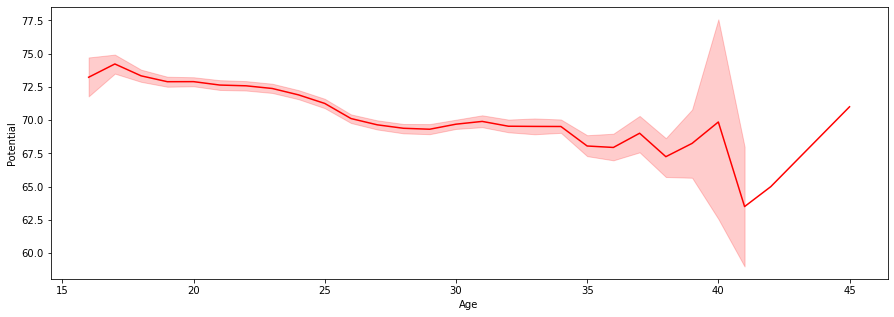

In [68]:
plt.figure(figsize=(15,5))
sns.lineplot(x= 'Age', y= 'Potential', data = fifa, color='red')
plt.show()

Potential decreases as the Age Increases

### 17. Which features directly contribute to the wages of the players? Support your answer with a plot and a metric

In [69]:
df_wage_rel = fifa[['Potential','Overall','Value','International Reputation','Release Clause','Wage']]
df_wage_rel.corr()

,Potential,Overall,Value,International Reputation,Release Clause,Wage
Potential,1.000000,0.663346,0.585352,0.386085,0.586751,0.490633
Overall,0.663346,1.000000,0.629198,0.503630,0.616422,0.573896
Value,0.585352,0.629198,1.000000,0.657724,0.994352,0.861528
International Reputation,0.386085,0.503630,0.657724,1.000000,0.641156,0.677923
Release Clause,0.586751,0.616422,0.994352,0.641156,1.000000,0.855922
Wage,0.490633,0.573896,0.861528,0.677923,0.855922,1.000000


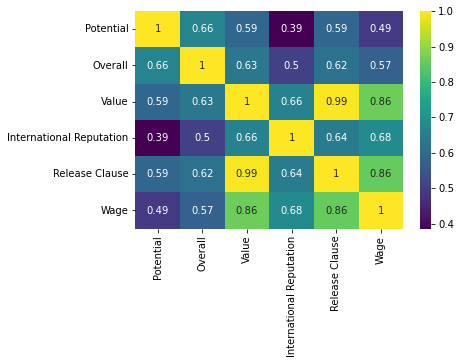

In [70]:
sns.heatmap(df_wage_rel[['Potential','Overall','Value','International Reputation','Release Clause','Wage']].corr(), annot=True, cmap='viridis')
plt.show()

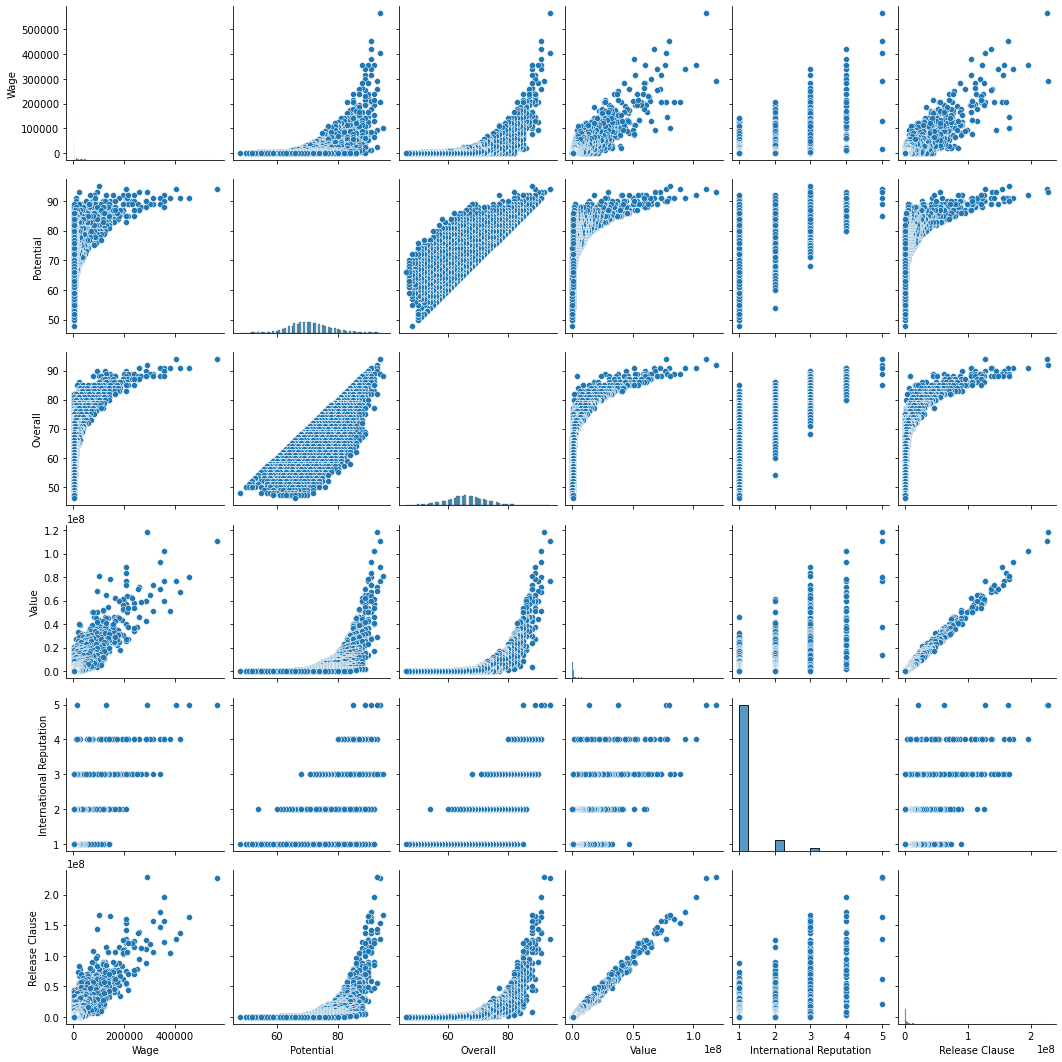

In [71]:
target = df_wage_rel['Wage']
sns.pairplot(df_wage_rel[['Wage', 'Potential', 'Overall', 'Value', 'International Reputation', 'Release Clause']])
plt.show()

### 18. Find the position in the pitch where the maximum number of players play and the position where the minimum number of players play? Display it using a plot

In [72]:
df_pos = fifa.groupby(['Position'])['Position'].count().reset_index(name='Count').sort_values(by=('Count'),ascending=False)
print(df_pos)

print("\nMaximum players playing at Position " + df_pos['Position'][df_pos['Count'] == df_pos['Count'].max()].iloc[0])
print( "Minimum players paying at Position " +  df_pos['Position'][df_pos['Count'] == df_pos['Count'].min()].iloc[0])

   Position  Count
26       ST   1924
5        GK   1900
1        CB   1646
4        CM   1276
7        LB   1223
17       RB   1199
22       RM   1022
12       LM   1012
0       CAM    877
2       CDM    873
18      RCB    615
8       LCB    595
19      RCM    355
9       LCM    353
14       LW    338
24       RW    325
20      RDM    228
10      LDM    224
13       LS    184
23       RS    179
25      RWB     84
15      LWB     76
3        CF     66
16      RAM     21
6       LAM     20
11       LF     15
21       RF     13

Maximum players playing at Position ST
Minimum players paying at Position RF


In [73]:
df_pos['Count_Per'] = round(df_pos['Count']*100/df_pos['Count'].max(),1)
df_pos

,Position,Count,Count_Per
26,ST,1924,100.0
5,GK,1900,98.8
1,CB,1646,85.6
4,CM,1276,66.3
7,LB,1223,63.6
17,RB,1199,62.3
22,RM,1022,53.1
12,LM,1012,52.6
0,CAM,877,45.6
2,CDM,873,45.4


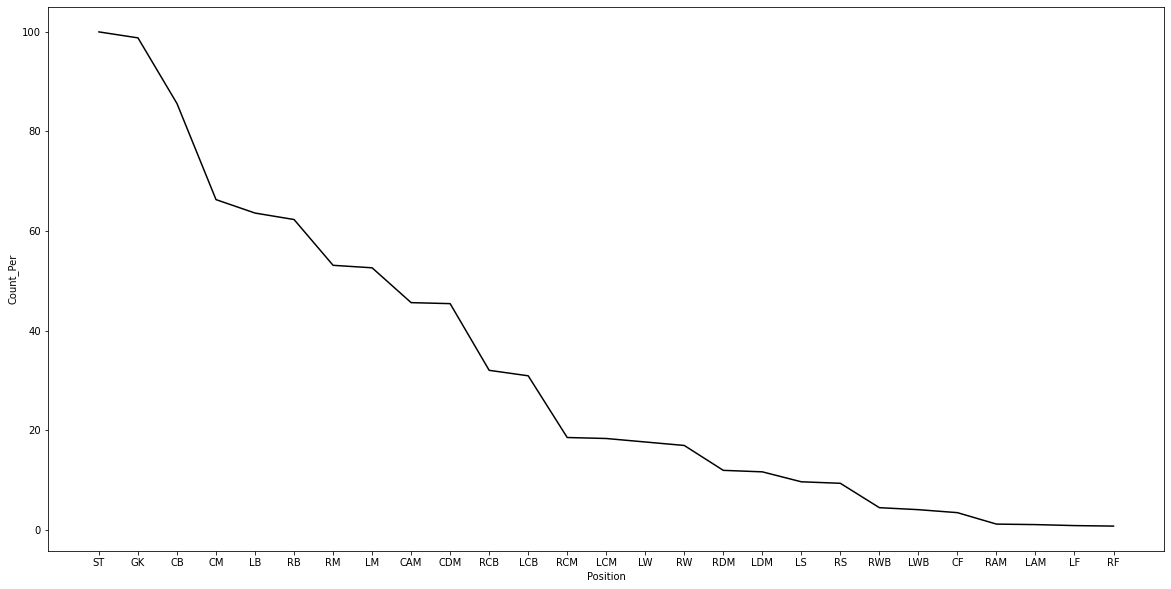

In [74]:
plt.figure(figsize=(20,10))
sns.lineplot(x= 'Position', y= 'Count_Per', data = df_pos, color='black')
plt.show()

### 19. How many players are from the club 'Juventus' and the wage is greater than 200K? Display all the information of such players

In [75]:
filter_val = np.where((fifa['Club'] == 'Juventus') & (fifa['Wage'] > 200000))
df_filter = fifa.loc[filter_val]

print(str(df_filter['Club'].count()) + " players in Juventus club has Wages > 200000 ")
display(df_filter)

3 players in Juventus club has Wages > 200000 


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
15,211110,P. Dybala,24,Argentina,89,94,Juventus,89000000.0,205000.0,Left,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,153500000.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0


### 20. Generate a data frame containing top 5 players by Overall rating for each unique position.

In [76]:
df_top5_unique_pos = fifa.groupby(by = ['Position']).apply(lambda x: x.sort_values('Overall', ascending = False).head(5))
df_top5_unique_pos.info()
display(df_top5_unique_pos)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 135 entries, ('CAM', 17) to ('ST', 36)
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        135 non-null    int64         
 1   Name                      135 non-null    object        
 2   Age                       135 non-null    int64         
 3   Nationality               135 non-null    object        
 4   Overall                   135 non-null    int64         
 5   Potential                 135 non-null    int64         
 6   Club                      135 non-null    object        
 7   Value                     135 non-null    float64       
 8   Wage                      135 non-null    float64       
 9   Preferred Foot            135 non-null    object        
 10  International Reputation  135 non-null    float64       
 11  Weak Foot                 135 non-null    float64       
 12  Skill

ID               Name  Age Nationality  Overall  Potential  \
Position                                                                      
CAM      17  194765       A. Griezmann   27      France       89         90   
         31  190460         C. Eriksen   26     Denmark       88         91   
         61  201942    Roberto Firmino   26      Brazil       86         87   
         66  189596          T. Müller   28     Germany       86         86   
         74  176635            M. Özil   29     Germany       86         86   
...             ...                ...  ...         ...      ...        ...   
ST       1    20801  Cristiano Ronaldo   33    Portugal       94         94   
         10  188545     R. Lewandowski   29      Poland       90         90   
         16  202126            H. Kane   24     England       89         91   
         23  153079          S. Agüero   30   Argentina       89         89   
         36  173731            G. Bale   28       Wales       88         88   

                          Club       Value      Wage Preferred Foot  ...  \
Position                                                             ...   
CAM      17    Atlético Madrid  78000000.0  145000.0           Left  ...   
         31  Tottenham Hotspur  73500000.0  205000.0          Right  ...   
         61          Liverpool  53000000.0  195000.0          Right  ...   
         66  FC Bayern München  45000000.0  135000.0          Right  ...   
         74            Arsenal  43500000.0  190000.0           Left  ...   
...                        ...         ...       ...            ...  ...   
ST       1            Juventus  77000000.0  405000.0          Right  ...   
         10  FC Bayern München  77000000.0  205000.0          Right  ...   
         16  Tottenham Hotspur  83500000.0  205000.0          Right  ...   
         23    Manchester City  64500000.0  300000.0          Right  ...   
         36        Real Madrid  60000000.0  355000.0           Left  ...   

             Composure  Marking  StandingTackle SlidingTackle GKDiving  \
Position                                                                 
CAM      17       87.0     59.0            47.0          48.0     14.0   
         31       88.0     59.0            57.0          22.0      9.0   
         61       87.0     60.0            64.0          42.0      8.0   
         66       83.0     44.0            41.0          44.0      6.0   
         74       82.0     24.0            16.0          19.0      6.0   
...                ...      ...             ...           ...      ...   
ST       1        95.0     28.0            31.0          23.0      7.0   
         10       86.0     34.0            42.0          19.0     15.0   
         16       89.0     56.0            36.0          38.0      8.0   
         23       90.0     30.0            20.0          12.0     13.0   
         36       86.0     54.0            55.0          52.0     15.0   

            GKHandling  GKKicking  GKPositioning GKReflexes  Release Clause  
Position                                                                     
CAM      17        8.0       14.0           13.0       14.0     165800000.0  
         31       14.0        7.0            7.0        6.0     141500000.0  
         61       11.0        9.0            6.0       10.0     104700000.0  
         66        7.0       11.0           14.0       14.0      74300000.0  
         74       14.0       10.0            6.0       14.0      82700000.0  
...                ...        ...            ...        ...             ...  
ST       1        11.0       15.0           14.0       11.0     127100000.0  
         10        6.0       12.0            8.0       10.0     127100000.0  
         16       10.0       11.0           14.0       11.0     160700000.0  
         23       15.0        6.0           11.0       14.0     119300000.0  
         36       15.0       11.0            5.0        6.0     123000000.0  

[135 rows x 56 columns

### 21. What is the average wage one can expect to pay for the top 5 players in every position?

In [77]:
avg_wage= df_top5_unique_pos['Wage'].groupby('Position').apply(np.mean)
print(avg_wage)

Position
CAM    174000.0
CB     139600.0
CDM    217000.0
CF      47400.0
CM     130600.0
GK     192800.0
LAM     19000.0
LB     177200.0
LCB    162000.0
LCM    184400.0
LDM     94200.0
LF     121200.0
LM     164600.0
LS      92200.0
LW     261000.0
LWB     30000.0
RAM     45400.0
RB     155400.0
RCB    231000.0
RCM    240800.0
RDM    105000.0
RF     148000.0
RM     131400.0
RS     130400.0
RW     202000.0
RWB     44200.0
ST     294000.0
Name: Wage, dtype: float64
